In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import matplotlib.pylab as plt
# https://docs.scipy.org/doc/numpy/reference/routines.math.html
import numpy as np

In [4]:
from distutils.version import StrictVersion

In [5]:
import sklearn

assert StrictVersion(sklearn.__version__ ) >= StrictVersion('0.18.1')

sklearn.__version__

'0.18.2'

In [6]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

assert StrictVersion(tf.__version__) >= StrictVersion('1.1.0')

tf.__version__

'1.2.1'

In [7]:
import keras

assert StrictVersion(keras.__version__) >= StrictVersion('2.0.0')

keras.__version__

Using TensorFlow backend.


'2.0.4'

In [8]:
from sklearn.datasets import load_iris
iris = load_iris()

In [9]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

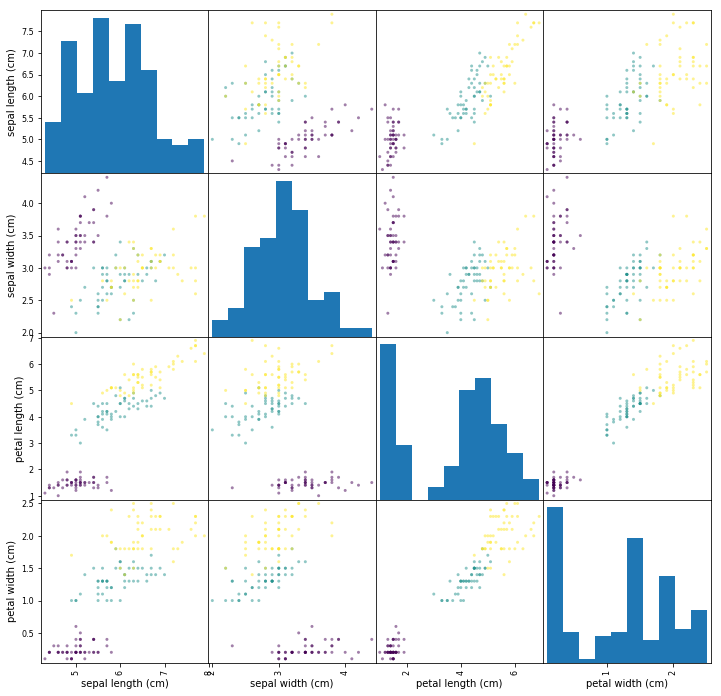

In [10]:
import pandas as pd
    
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_df, c=iris.target, figsize=(12, 12));

## Zuerst testen wir unser Modell, ob wir es überhaupt trainiert bekommen, indem wir auf einer kleinen Menge von Daten overfitten

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
iris.data[0]

array([ 5.1,  3.5,  1.4,  0.2])

In [13]:
import numpy as np

y = np.array(iris.target)
X = np.array(iris.data)
y.shape, X.shape

((150,), (150, 4))

In [14]:
from keras.utils.np_utils import to_categorical

num_categories = 3

y = to_categorical(y, num_categories)

In [15]:
# http://cs231n.github.io/neural-networks-3/#sanitycheck
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state=42)

In [16]:
X_train.shape, y_train.shape

((15, 4), (15, 3))

In [36]:
from keras.models import Model
from keras.layers import Dense, Dropout, Input

In [18]:
# Input?

In [19]:
inputs = Input(shape=(4, ))

In [20]:
# Dense?

In [21]:
# just three neurons and linear actions, would that be good enough?
fc = Dense(3)(inputs)

In [22]:
predictions = Dense(3, activation='softmax')(fc)

In [23]:
model = Model(input=inputs, output=predictions)

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 12        
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
model.fit(X_train, y_train, epochs=500, batch_size=20, validation_split=0.2)
# model.fit(X, y, epochs=50, batch_size=5, validation_split=0.3)

Train on 12 samples, validate on 3 samples
Epoch 1/500
12/12 [==============================] - 0s - loss: 5.2473 - acc: 0.5000 - val_loss: 4.9994 - val_acc: 0.3333
Epoch 2/500
12/12 [==============================] - 0s - loss: 5.1312 - acc: 0.5000 - val_loss: 4.9067 - val_acc: 0.3333
Epoch 3/500
12/12 [==============================] - 0s - loss: 5.0470 - acc: 0.5000 - val_loss: 4.8290 - val_acc: 0.3333
Epoch 4/500
12/12 [==============================] - 0s - loss: 4.9763 - acc: 0.5000 - val_loss: 4.7600 - val_acc: 0.3333
Epoch 5/500
12/12 [==============================] - 0s - loss: 4.9134 - acc: 0.5000 - val_loss: 4.6968 - val_acc: 0.3333
Epoch 6/500
12/12 [==============================] - 0s - loss: 4.8559 - acc: 0.5000 - val_loss: 4.6377 - val_acc: 0.3333
Epoch 7/500
12/12 [==============================] - 0s - loss: 4.8020 - acc: 0.5000 - val_loss: 4.5817 - val_acc: 0.3333
Epoch 8/500
12/12 [==============================] - 0s - loss: 4.7509 - acc: 0.5000 - val_loss: 4.5282

12/12 [==============================] - 0s - loss: 2.5711 - acc: 0.5000 - val_loss: 2.2722 - val_acc: 0.3333
Epoch 68/500
12/12 [==============================] - 0s - loss: 2.5387 - acc: 0.5000 - val_loss: 2.2427 - val_acc: 0.3333
Epoch 69/500
12/12 [==============================] - 0s - loss: 2.5065 - acc: 0.5000 - val_loss: 2.2135 - val_acc: 0.3333
Epoch 70/500
12/12 [==============================] - 0s - loss: 2.4744 - acc: 0.5000 - val_loss: 2.1846 - val_acc: 0.3333
Epoch 71/500
12/12 [==============================] - 0s - loss: 2.4425 - acc: 0.5000 - val_loss: 2.1560 - val_acc: 0.3333
Epoch 72/500
12/12 [==============================] - 0s - loss: 2.4107 - acc: 0.5000 - val_loss: 2.1276 - val_acc: 0.3333
Epoch 73/500
12/12 [==============================] - 0s - loss: 2.3792 - acc: 0.5000 - val_loss: 2.0996 - val_acc: 0.3333
Epoch 74/500
12/12 [==============================] - 0s - loss: 2.3478 - acc: 0.5000 - val_loss: 2.0719 - val_acc: 0.3333
Epoch 75/500
12/12 [=========

12/12 [==============================] - 0s - loss: 1.1821 - acc: 0.4167 - val_loss: 1.3168 - val_acc: 0.3333
Epoch 134/500
12/12 [==============================] - 0s - loss: 1.1772 - acc: 0.4167 - val_loss: 1.3187 - val_acc: 0.3333
Epoch 135/500
12/12 [==============================] - 0s - loss: 1.1725 - acc: 0.3333 - val_loss: 1.3207 - val_acc: 0.3333
Epoch 136/500
12/12 [==============================] - 0s - loss: 1.1680 - acc: 0.3333 - val_loss: 1.3229 - val_acc: 0.3333
Epoch 137/500
12/12 [==============================] - 0s - loss: 1.1637 - acc: 0.3333 - val_loss: 1.3253 - val_acc: 0.3333
Epoch 138/500
12/12 [==============================] - 0s - loss: 1.1597 - acc: 0.3333 - val_loss: 1.3279 - val_acc: 0.3333
Epoch 139/500
12/12 [==============================] - 0s - loss: 1.1557 - acc: 0.3333 - val_loss: 1.3306 - val_acc: 0.3333
Epoch 140/500
12/12 [==============================] - 0s - loss: 1.1520 - acc: 0.3333 - val_loss: 1.3334 - val_acc: 0.3333
Epoch 141/500
12/12 [=

12/12 [==============================] - 0s - loss: 1.0060 - acc: 0.4167 - val_loss: 1.4855 - val_acc: 0.3333
Epoch 200/500
12/12 [==============================] - 0s - loss: 1.0039 - acc: 0.4167 - val_loss: 1.4866 - val_acc: 0.3333
Epoch 201/500
12/12 [==============================] - 0s - loss: 1.0018 - acc: 0.4167 - val_loss: 1.4876 - val_acc: 0.3333
Epoch 202/500
12/12 [==============================] - 0s - loss: 0.9997 - acc: 0.4167 - val_loss: 1.4887 - val_acc: 0.3333
Epoch 203/500
12/12 [==============================] - 0s - loss: 0.9976 - acc: 0.4167 - val_loss: 1.4897 - val_acc: 0.3333
Epoch 204/500
12/12 [==============================] - 0s - loss: 0.9955 - acc: 0.4167 - val_loss: 1.4907 - val_acc: 0.3333
Epoch 205/500
12/12 [==============================] - 0s - loss: 0.9934 - acc: 0.4167 - val_loss: 1.4917 - val_acc: 0.3333
Epoch 206/500
12/12 [==============================] - 0s - loss: 0.9913 - acc: 0.4167 - val_loss: 1.4927 - val_acc: 0.3333
Epoch 207/500
12/12 [=

12/12 [==============================] - 0s - loss: 0.8820 - acc: 0.5833 - val_loss: 1.4706 - val_acc: 0.6667
Epoch 266/500
12/12 [==============================] - 0s - loss: 0.8803 - acc: 0.6667 - val_loss: 1.4681 - val_acc: 0.6667
Epoch 267/500
12/12 [==============================] - 0s - loss: 0.8786 - acc: 0.5833 - val_loss: 1.4679 - val_acc: 0.6667
Epoch 268/500
12/12 [==============================] - 0s - loss: 0.8770 - acc: 0.6667 - val_loss: 1.4655 - val_acc: 0.6667
Epoch 269/500
12/12 [==============================] - 0s - loss: 0.8753 - acc: 0.6667 - val_loss: 1.4652 - val_acc: 0.6667
Epoch 270/500
12/12 [==============================] - 0s - loss: 0.8736 - acc: 0.7500 - val_loss: 1.4629 - val_acc: 0.6667
Epoch 271/500
12/12 [==============================] - 0s - loss: 0.8719 - acc: 0.6667 - val_loss: 1.4625 - val_acc: 0.6667
Epoch 272/500
12/12 [==============================] - 0s - loss: 0.8702 - acc: 0.7500 - val_loss: 1.4602 - val_acc: 0.6667
Epoch 273/500
12/12 [=

12/12 [==============================] - 0s - loss: 0.7765 - acc: 0.7500 - val_loss: 1.3666 - val_acc: 0.6667
Epoch 332/500
12/12 [==============================] - 0s - loss: 0.7750 - acc: 0.7500 - val_loss: 1.3638 - val_acc: 0.6667
Epoch 333/500
12/12 [==============================] - 0s - loss: 0.7735 - acc: 0.7500 - val_loss: 1.3629 - val_acc: 0.6667
Epoch 334/500
12/12 [==============================] - 0s - loss: 0.7720 - acc: 0.7500 - val_loss: 1.3601 - val_acc: 0.6667
Epoch 335/500
12/12 [==============================] - 0s - loss: 0.7705 - acc: 0.7500 - val_loss: 1.3592 - val_acc: 0.6667
Epoch 336/500
12/12 [==============================] - 0s - loss: 0.7690 - acc: 0.7500 - val_loss: 1.3563 - val_acc: 0.6667
Epoch 337/500
12/12 [==============================] - 0s - loss: 0.7675 - acc: 0.7500 - val_loss: 1.3554 - val_acc: 0.6667
Epoch 338/500
12/12 [==============================] - 0s - loss: 0.7660 - acc: 0.7500 - val_loss: 1.3525 - val_acc: 0.6667
Epoch 339/500
12/12 [=

12/12 [==============================] - 0s - loss: 0.6806 - acc: 0.8333 - val_loss: 1.2253 - val_acc: 0.6667
Epoch 398/500
12/12 [==============================] - 0s - loss: 0.6791 - acc: 0.8333 - val_loss: 1.2217 - val_acc: 0.6667
Epoch 399/500
12/12 [==============================] - 0s - loss: 0.6777 - acc: 0.8333 - val_loss: 1.2204 - val_acc: 0.6667
Epoch 400/500
12/12 [==============================] - 0s - loss: 0.6763 - acc: 0.8333 - val_loss: 1.2167 - val_acc: 0.6667
Epoch 401/500
12/12 [==============================] - 0s - loss: 0.6749 - acc: 0.8333 - val_loss: 1.2154 - val_acc: 0.6667
Epoch 402/500
12/12 [==============================] - 0s - loss: 0.6735 - acc: 0.8333 - val_loss: 1.2117 - val_acc: 0.6667
Epoch 403/500
12/12 [==============================] - 0s - loss: 0.6721 - acc: 0.8333 - val_loss: 1.2104 - val_acc: 0.6667
Epoch 404/500
12/12 [==============================] - 0s - loss: 0.6707 - acc: 0.8333 - val_loss: 1.2067 - val_acc: 0.6667
Epoch 405/500
12/12 [=

12/12 [==============================] - 0s - loss: 0.5879 - acc: 0.8333 - val_loss: 1.0401 - val_acc: 0.6667
Epoch 464/500
12/12 [==============================] - 0s - loss: 0.5865 - acc: 0.8333 - val_loss: 1.0366 - val_acc: 0.6667
Epoch 465/500
12/12 [==============================] - 0s - loss: 0.5851 - acc: 0.8333 - val_loss: 1.0339 - val_acc: 0.6667
Epoch 466/500
12/12 [==============================] - 0s - loss: 0.5837 - acc: 0.8333 - val_loss: 1.0304 - val_acc: 0.6667
Epoch 467/500
12/12 [==============================] - 0s - loss: 0.5823 - acc: 0.8333 - val_loss: 1.0277 - val_acc: 0.6667
Epoch 468/500
12/12 [==============================] - 0s - loss: 0.5808 - acc: 0.8333 - val_loss: 1.0242 - val_acc: 0.6667
Epoch 469/500
12/12 [==============================] - 0s - loss: 0.5794 - acc: 0.8333 - val_loss: 1.0214 - val_acc: 0.6667
Epoch 470/500
12/12 [==============================] - 0s - loss: 0.5780 - acc: 0.8333 - val_loss: 1.0179 - val_acc: 0.6667
Epoch 471/500
12/12 [=

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [28]:
X_train.shape, y_train.shape

((120, 4), (120, 3))

In [29]:
# 3 neurons just might not be enough, we never seem to achieve 100% accuracy
# so we increase the number of neurons until we get close to 100%
# also add a little of non linearity and some dropout to avoid overfitting

inputs = Input(shape=(4, ))
# fc = Dense(3)(inputs)
fc = Dense(20, activation='sigmoid')(inputs)
fc = Dropout(0.25)(fc)
predictions = Dense(3, activation='softmax')(fc)
model = Model(input=inputs, output=predictions)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
%time model.fit(X_train, y_train, epochs=1000, batch_size=100, validation_split=0.3)

Train on 84 samples, validate on 36 samples
Epoch 1/1000
84/84 [==============================] - 0s - loss: 1.2397 - acc: 0.3095 - val_loss: 1.1875 - val_acc: 0.3333
Epoch 2/1000
84/84 [==============================] - 0s - loss: 1.1744 - acc: 0.3571 - val_loss: 1.1753 - val_acc: 0.3333
Epoch 3/1000
84/84 [==============================] - 0s - loss: 1.2147 - acc: 0.3095 - val_loss: 1.1654 - val_acc: 0.3333
Epoch 4/1000
84/84 [==============================] - 0s - loss: 1.2758 - acc: 0.3095 - val_loss: 1.1561 - val_acc: 0.3333
Epoch 5/1000
84/84 [==============================] - 0s - loss: 1.1764 - acc: 0.3214 - val_loss: 1.1488 - val_acc: 0.3333
Epoch 6/1000
84/84 [==============================] - 0s - loss: 1.1613 - acc: 0.3571 - val_loss: 1.1423 - val_acc: 0.3333
Epoch 7/1000
84/84 [==============================] - 0s - loss: 1.1280 - acc: 0.3810 - val_loss: 1.1366 - val_acc: 0.3333
Epoch 8/1000
84/84 [==============================] - 0s - loss: 1.1424 - acc: 0.3095 - val_los

84/84 [==============================] - 0s - loss: 1.0167 - acc: 0.4643 - val_loss: 0.9514 - val_acc: 0.8333
Epoch 67/1000
84/84 [==============================] - 0s - loss: 0.9588 - acc: 0.5833 - val_loss: 0.9491 - val_acc: 0.8333
Epoch 68/1000
84/84 [==============================] - 0s - loss: 0.9732 - acc: 0.5952 - val_loss: 0.9467 - val_acc: 0.7500
Epoch 69/1000
84/84 [==============================] - 0s - loss: 0.9586 - acc: 0.5714 - val_loss: 0.9446 - val_acc: 0.8611
Epoch 70/1000
84/84 [==============================] - 0s - loss: 0.9657 - acc: 0.5952 - val_loss: 0.9424 - val_acc: 0.8611
Epoch 71/1000
84/84 [==============================] - 0s - loss: 0.9897 - acc: 0.5476 - val_loss: 0.9400 - val_acc: 0.8611
Epoch 72/1000
84/84 [==============================] - 0s - loss: 1.0356 - acc: 0.4762 - val_loss: 0.9378 - val_acc: 0.8611
Epoch 73/1000
84/84 [==============================] - 0s - loss: 0.9825 - acc: 0.5595 - val_loss: 0.9357 - val_acc: 0.7500
Epoch 74/1000
84/84 [=

84/84 [==============================] - 0s - loss: 0.8547 - acc: 0.6429 - val_loss: 0.8089 - val_acc: 0.9722
Epoch 132/1000
84/84 [==============================] - 0s - loss: 0.8220 - acc: 0.6667 - val_loss: 0.8066 - val_acc: 0.9722
Epoch 133/1000
84/84 [==============================] - 0s - loss: 0.8235 - acc: 0.6667 - val_loss: 0.8045 - val_acc: 0.9722
Epoch 134/1000
84/84 [==============================] - 0s - loss: 0.8329 - acc: 0.7024 - val_loss: 0.8022 - val_acc: 0.9722
Epoch 135/1000
84/84 [==============================] - 0s - loss: 0.8429 - acc: 0.5476 - val_loss: 0.8002 - val_acc: 0.9722
Epoch 136/1000
84/84 [==============================] - 0s - loss: 0.8245 - acc: 0.6429 - val_loss: 0.7980 - val_acc: 0.9722
Epoch 137/1000
84/84 [==============================] - 0s - loss: 0.8051 - acc: 0.7738 - val_loss: 0.7960 - val_acc: 0.9722
Epoch 138/1000
84/84 [==============================] - 0s - loss: 0.7981 - acc: 0.7024 - val_loss: 0.7939 - val_acc: 0.9722
Epoch 139/1000


84/84 [==============================] - 0s - loss: 0.7536 - acc: 0.6429 - val_loss: 0.6843 - val_acc: 0.9722
Epoch 197/1000
84/84 [==============================] - 0s - loss: 0.6764 - acc: 0.7143 - val_loss: 0.6825 - val_acc: 0.9722
Epoch 198/1000
84/84 [==============================] - 0s - loss: 0.7019 - acc: 0.7143 - val_loss: 0.6807 - val_acc: 0.9722
Epoch 199/1000
84/84 [==============================] - 0s - loss: 0.6915 - acc: 0.7500 - val_loss: 0.6789 - val_acc: 0.9722
Epoch 200/1000
84/84 [==============================] - 0s - loss: 0.7420 - acc: 0.5952 - val_loss: 0.6774 - val_acc: 0.9722
Epoch 201/1000
84/84 [==============================] - 0s - loss: 0.7007 - acc: 0.7262 - val_loss: 0.6754 - val_acc: 0.9722
Epoch 202/1000
84/84 [==============================] - 0s - loss: 0.7474 - acc: 0.6667 - val_loss: 0.6738 - val_acc: 0.9722
Epoch 203/1000
84/84 [==============================] - 0s - loss: 0.7221 - acc: 0.6905 - val_loss: 0.6722 - val_acc: 0.9722
Epoch 204/1000


84/84 [==============================] - 0s - loss: 0.5831 - acc: 0.7262 - val_loss: 0.5841 - val_acc: 1.0000
Epoch 262/1000
84/84 [==============================] - 0s - loss: 0.6097 - acc: 0.7381 - val_loss: 0.5829 - val_acc: 1.0000
Epoch 263/1000
84/84 [==============================] - 0s - loss: 0.6192 - acc: 0.7143 - val_loss: 0.5815 - val_acc: 1.0000
Epoch 264/1000
84/84 [==============================] - 0s - loss: 0.5823 - acc: 0.8095 - val_loss: 0.5801 - val_acc: 1.0000
Epoch 265/1000
84/84 [==============================] - 0s - loss: 0.6388 - acc: 0.7619 - val_loss: 0.5787 - val_acc: 1.0000
Epoch 266/1000
84/84 [==============================] - 0s - loss: 0.5923 - acc: 0.8452 - val_loss: 0.5776 - val_acc: 1.0000
Epoch 267/1000
84/84 [==============================] - 0s - loss: 0.5736 - acc: 0.7738 - val_loss: 0.5762 - val_acc: 1.0000
Epoch 268/1000
84/84 [==============================] - 0s - loss: 0.5554 - acc: 0.8333 - val_loss: 0.5750 - val_acc: 1.0000
Epoch 269/1000


84/84 [==============================] - 0s - loss: 0.5255 - acc: 0.8690 - val_loss: 0.5055 - val_acc: 1.0000
Epoch 327/1000
84/84 [==============================] - 0s - loss: 0.5323 - acc: 0.8214 - val_loss: 0.5046 - val_acc: 1.0000
Epoch 328/1000
84/84 [==============================] - 0s - loss: 0.5218 - acc: 0.8214 - val_loss: 0.5035 - val_acc: 1.0000
Epoch 329/1000
84/84 [==============================] - 0s - loss: 0.5405 - acc: 0.8571 - val_loss: 0.5024 - val_acc: 1.0000
Epoch 330/1000
84/84 [==============================] - 0s - loss: 0.5212 - acc: 0.8333 - val_loss: 0.5010 - val_acc: 1.0000
Epoch 331/1000
84/84 [==============================] - 0s - loss: 0.5591 - acc: 0.7500 - val_loss: 0.5001 - val_acc: 1.0000
Epoch 332/1000
84/84 [==============================] - 0s - loss: 0.5143 - acc: 0.8214 - val_loss: 0.4988 - val_acc: 1.0000
Epoch 333/1000
84/84 [==============================] - 0s - loss: 0.5189 - acc: 0.7857 - val_loss: 0.4978 - val_acc: 1.0000
Epoch 334/1000


84/84 [==============================] - 0s - loss: 0.4546 - acc: 0.9048 - val_loss: 0.4446 - val_acc: 1.0000
Epoch 392/1000
84/84 [==============================] - 0s - loss: 0.4886 - acc: 0.8214 - val_loss: 0.4441 - val_acc: 1.0000
Epoch 393/1000
84/84 [==============================] - 0s - loss: 0.4705 - acc: 0.8690 - val_loss: 0.4431 - val_acc: 1.0000
Epoch 394/1000
84/84 [==============================] - 0s - loss: 0.4636 - acc: 0.8929 - val_loss: 0.4412 - val_acc: 1.0000
Epoch 395/1000
84/84 [==============================] - 0s - loss: 0.4288 - acc: 0.9405 - val_loss: 0.4408 - val_acc: 1.0000
Epoch 396/1000
84/84 [==============================] - 0s - loss: 0.4738 - acc: 0.8452 - val_loss: 0.4398 - val_acc: 1.0000
Epoch 397/1000
84/84 [==============================] - 0s - loss: 0.4881 - acc: 0.8333 - val_loss: 0.4390 - val_acc: 1.0000
Epoch 398/1000
84/84 [==============================] - 0s - loss: 0.4802 - acc: 0.8571 - val_loss: 0.4381 - val_acc: 1.0000
Epoch 399/1000


84/84 [==============================] - 0s - loss: 0.4282 - acc: 0.8571 - val_loss: 0.3951 - val_acc: 1.0000
Epoch 457/1000
84/84 [==============================] - 0s - loss: 0.4096 - acc: 0.9048 - val_loss: 0.3937 - val_acc: 1.0000
Epoch 458/1000
84/84 [==============================] - 0s - loss: 0.4452 - acc: 0.8095 - val_loss: 0.3932 - val_acc: 1.0000
Epoch 459/1000
84/84 [==============================] - 0s - loss: 0.4063 - acc: 0.9048 - val_loss: 0.3927 - val_acc: 1.0000
Epoch 460/1000
84/84 [==============================] - 0s - loss: 0.4356 - acc: 0.8214 - val_loss: 0.3924 - val_acc: 1.0000
Epoch 461/1000
84/84 [==============================] - 0s - loss: 0.4282 - acc: 0.8810 - val_loss: 0.3915 - val_acc: 1.0000
Epoch 462/1000
84/84 [==============================] - 0s - loss: 0.4191 - acc: 0.8571 - val_loss: 0.3904 - val_acc: 1.0000
Epoch 463/1000
84/84 [==============================] - 0s - loss: 0.4122 - acc: 0.8571 - val_loss: 0.3891 - val_acc: 1.0000
Epoch 464/1000


84/84 [==============================] - 0s - loss: 0.3871 - acc: 0.8929 - val_loss: 0.3531 - val_acc: 1.0000
Epoch 522/1000
84/84 [==============================] - 0s - loss: 0.3643 - acc: 0.9286 - val_loss: 0.3521 - val_acc: 1.0000
Epoch 523/1000
84/84 [==============================] - 0s - loss: 0.3547 - acc: 0.9048 - val_loss: 0.3517 - val_acc: 1.0000
Epoch 524/1000
84/84 [==============================] - 0s - loss: 0.3803 - acc: 0.8810 - val_loss: 0.3514 - val_acc: 1.0000
Epoch 525/1000
84/84 [==============================] - 0s - loss: 0.3628 - acc: 0.9167 - val_loss: 0.3508 - val_acc: 1.0000
Epoch 526/1000
84/84 [==============================] - 0s - loss: 0.3625 - acc: 0.8929 - val_loss: 0.3508 - val_acc: 1.0000
Epoch 527/1000
84/84 [==============================] - 0s - loss: 0.3679 - acc: 0.8929 - val_loss: 0.3506 - val_acc: 1.0000
Epoch 528/1000
84/84 [==============================] - 0s - loss: 0.3665 - acc: 0.9405 - val_loss: 0.3484 - val_acc: 1.0000
Epoch 529/1000


84/84 [==============================] - 0s - loss: 0.3311 - acc: 0.8929 - val_loss: 0.3172 - val_acc: 1.0000
Epoch 587/1000
84/84 [==============================] - 0s - loss: 0.2855 - acc: 0.9524 - val_loss: 0.3167 - val_acc: 1.0000
Epoch 588/1000
84/84 [==============================] - 0s - loss: 0.3337 - acc: 0.9167 - val_loss: 0.3166 - val_acc: 1.0000
Epoch 589/1000
84/84 [==============================] - 0s - loss: 0.3596 - acc: 0.8690 - val_loss: 0.3158 - val_acc: 1.0000
Epoch 590/1000
84/84 [==============================] - 0s - loss: 0.3179 - acc: 0.9524 - val_loss: 0.3146 - val_acc: 1.0000
Epoch 591/1000
84/84 [==============================] - 0s - loss: 0.2957 - acc: 0.9643 - val_loss: 0.3152 - val_acc: 1.0000
Epoch 592/1000
84/84 [==============================] - 0s - loss: 0.3571 - acc: 0.8929 - val_loss: 0.3150 - val_acc: 1.0000
Epoch 593/1000
84/84 [==============================] - 0s - loss: 0.3116 - acc: 0.9286 - val_loss: 0.3135 - val_acc: 1.0000
Epoch 594/1000


84/84 [==============================] - 0s - loss: 0.2627 - acc: 0.9286 - val_loss: 0.2829 - val_acc: 1.0000
Epoch 652/1000
84/84 [==============================] - 0s - loss: 0.2785 - acc: 0.9286 - val_loss: 0.2837 - val_acc: 1.0000
Epoch 653/1000
84/84 [==============================] - 0s - loss: 0.3099 - acc: 0.9286 - val_loss: 0.2850 - val_acc: 0.9722
Epoch 654/1000
84/84 [==============================] - 0s - loss: 0.3339 - acc: 0.8810 - val_loss: 0.2867 - val_acc: 0.9722
Epoch 655/1000
84/84 [==============================] - 0s - loss: 0.2902 - acc: 0.9167 - val_loss: 0.2827 - val_acc: 1.0000
Epoch 656/1000
84/84 [==============================] - 0s - loss: 0.3082 - acc: 0.8810 - val_loss: 0.2810 - val_acc: 1.0000
Epoch 657/1000
84/84 [==============================] - 0s - loss: 0.3157 - acc: 0.8810 - val_loss: 0.2811 - val_acc: 1.0000
Epoch 658/1000
84/84 [==============================] - 0s - loss: 0.2977 - acc: 0.9286 - val_loss: 0.2812 - val_acc: 1.0000
Epoch 659/1000


84/84 [==============================] - 0s - loss: 0.2720 - acc: 0.9167 - val_loss: 0.2586 - val_acc: 1.0000
Epoch 717/1000
84/84 [==============================] - 0s - loss: 0.2873 - acc: 0.9405 - val_loss: 0.2589 - val_acc: 0.9722
Epoch 718/1000
84/84 [==============================] - 0s - loss: 0.2631 - acc: 0.9167 - val_loss: 0.2597 - val_acc: 0.9722
Epoch 719/1000
84/84 [==============================] - 0s - loss: 0.2813 - acc: 0.9167 - val_loss: 0.2575 - val_acc: 1.0000
Epoch 720/1000
84/84 [==============================] - 0s - loss: 0.2575 - acc: 0.9524 - val_loss: 0.2564 - val_acc: 1.0000
Epoch 721/1000
84/84 [==============================] - 0s - loss: 0.2836 - acc: 0.9048 - val_loss: 0.2549 - val_acc: 1.0000
Epoch 722/1000
84/84 [==============================] - 0s - loss: 0.2683 - acc: 0.9524 - val_loss: 0.2541 - val_acc: 1.0000
Epoch 723/1000
84/84 [==============================] - 0s - loss: 0.2897 - acc: 0.9048 - val_loss: 0.2524 - val_acc: 1.0000
Epoch 724/1000


84/84 [==============================] - 0s - loss: 0.2546 - acc: 0.9048 - val_loss: 0.2297 - val_acc: 1.0000
Epoch 782/1000
84/84 [==============================] - 0s - loss: 0.2526 - acc: 0.9524 - val_loss: 0.2302 - val_acc: 1.0000
Epoch 783/1000
84/84 [==============================] - 0s - loss: 0.2416 - acc: 0.9405 - val_loss: 0.2312 - val_acc: 1.0000
Epoch 784/1000
84/84 [==============================] - 0s - loss: 0.2692 - acc: 0.9167 - val_loss: 0.2308 - val_acc: 1.0000
Epoch 785/1000
84/84 [==============================] - 0s - loss: 0.2652 - acc: 0.9048 - val_loss: 0.2302 - val_acc: 1.0000
Epoch 786/1000
84/84 [==============================] - 0s - loss: 0.2290 - acc: 0.9524 - val_loss: 0.2313 - val_acc: 1.0000
Epoch 787/1000
84/84 [==============================] - 0s - loss: 0.2451 - acc: 0.9286 - val_loss: 0.2287 - val_acc: 1.0000
Epoch 788/1000
84/84 [==============================] - 0s - loss: 0.2267 - acc: 0.9286 - val_loss: 0.2290 - val_acc: 1.0000
Epoch 789/1000


84/84 [==============================] - 0s - loss: 0.2310 - acc: 0.9643 - val_loss: 0.2091 - val_acc: 1.0000
Epoch 847/1000
84/84 [==============================] - 0s - loss: 0.2529 - acc: 0.9405 - val_loss: 0.2087 - val_acc: 1.0000
Epoch 848/1000
84/84 [==============================] - 0s - loss: 0.2153 - acc: 0.9643 - val_loss: 0.2066 - val_acc: 1.0000
Epoch 849/1000
84/84 [==============================] - 0s - loss: 0.2789 - acc: 0.9167 - val_loss: 0.2072 - val_acc: 1.0000
Epoch 850/1000
84/84 [==============================] - 0s - loss: 0.2260 - acc: 0.9286 - val_loss: 0.2088 - val_acc: 1.0000
Epoch 851/1000
84/84 [==============================] - 0s - loss: 0.2205 - acc: 0.9643 - val_loss: 0.2120 - val_acc: 1.0000
Epoch 852/1000
84/84 [==============================] - 0s - loss: 0.2383 - acc: 0.9286 - val_loss: 0.2099 - val_acc: 1.0000
Epoch 853/1000
84/84 [==============================] - 0s - loss: 0.2505 - acc: 0.8929 - val_loss: 0.2113 - val_acc: 1.0000
Epoch 854/1000


84/84 [==============================] - 0s - loss: 0.2269 - acc: 0.9048 - val_loss: 0.1948 - val_acc: 1.0000
Epoch 912/1000
84/84 [==============================] - 0s - loss: 0.2375 - acc: 0.9405 - val_loss: 0.1942 - val_acc: 1.0000
Epoch 913/1000
84/84 [==============================] - 0s - loss: 0.2042 - acc: 0.9524 - val_loss: 0.1922 - val_acc: 1.0000
Epoch 914/1000
84/84 [==============================] - 0s - loss: 0.2395 - acc: 0.9167 - val_loss: 0.1909 - val_acc: 1.0000
Epoch 915/1000
84/84 [==============================] - 0s - loss: 0.1954 - acc: 0.9524 - val_loss: 0.1871 - val_acc: 1.0000
Epoch 916/1000
84/84 [==============================] - 0s - loss: 0.2305 - acc: 0.9405 - val_loss: 0.1881 - val_acc: 1.0000
Epoch 917/1000
84/84 [==============================] - 0s - loss: 0.1813 - acc: 0.9524 - val_loss: 0.1879 - val_acc: 1.0000
Epoch 918/1000
84/84 [==============================] - 0s - loss: 0.2358 - acc: 0.9167 - val_loss: 0.1872 - val_acc: 1.0000
Epoch 919/1000


84/84 [==============================] - 0s - loss: 0.2341 - acc: 0.9048 - val_loss: 0.1735 - val_acc: 1.0000
Epoch 977/1000
84/84 [==============================] - 0s - loss: 0.2196 - acc: 0.8929 - val_loss: 0.1727 - val_acc: 1.0000
Epoch 978/1000
84/84 [==============================] - 0s - loss: 0.2405 - acc: 0.9167 - val_loss: 0.1738 - val_acc: 1.0000
Epoch 979/1000
84/84 [==============================] - 0s - loss: 0.2236 - acc: 0.9286 - val_loss: 0.1732 - val_acc: 1.0000
Epoch 980/1000
84/84 [==============================] - 0s - loss: 0.1944 - acc: 0.9405 - val_loss: 0.1755 - val_acc: 1.0000
Epoch 981/1000
84/84 [==============================] - 0s - loss: 0.2111 - acc: 0.9048 - val_loss: 0.1750 - val_acc: 1.0000
Epoch 982/1000
84/84 [==============================] - 0s - loss: 0.1914 - acc: 0.9524 - val_loss: 0.1718 - val_acc: 1.0000
Epoch 983/1000
84/84 [==============================] - 0s - loss: 0.2035 - acc: 0.9286 - val_loss: 0.1760 - val_acc: 1.0000
Epoch 984/1000


### Completely avoided overfitting, but train accuracy not perfect

In [31]:
train_loss, train_accuracy = model.evaluate(X_train, y_train, batch_size=32)
train_loss, train_accuracy

 32/120 [=======>......................] - ETA: 0s

(0.15667588412761688, 0.98333333333333328)

In [32]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=32)
test_loss, test_accuracy

30/30 [==============================] - 0s


(0.13698992133140564, 1.0)

In [33]:
!mkdir models

mkdir: cannot create directory ‘models’: File exists


In [34]:
model.save('models/nn-iris.hdf5')

In [35]:
!ls -l models

total 17350657
-rwxrwxrwx 1 root root 34676896 Jul  5 09:08 conv-vgg-augmented.h5
-rwxrwxrwx 1 root root    18472 Jul 18 11:17 nn-iris.hdf5
